In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Normalizer, OneHotEncoder
from sklearn.pipeline import Pipeline
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler 

from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import *
import sklearn.metrics as metrics

## Data Import

In [54]:
df = pd.read_csv('C:/Users/Bogdan/Desktop/wines.csv')

In [55]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


## Finding missing values

In [57]:
df.isna().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [58]:
df.year.unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

In [59]:
df = df.replace('N.V.', np.nan)

In [60]:
df.isna().sum()

winery            0
wine              0
year            290
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [61]:
df.type.unique()

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Sherry', 'Priorat Red', 'Rioja Red', 'Rioja White',
       'Grenache', nan, 'Cava', 'Verdejo', 'Syrah', 'Monastrell',
       'Mencia', 'Sparkling', 'Montsant Red', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)

In [62]:
df.body.unique()

array([ 5.,  4.,  3., nan,  2.])

In [63]:
df.acidity.unique()

array([ 3.,  2.,  1., nan])

In [64]:
categorydf = df[['winery','wine','region','type']]
categorydf.columns=['winerynum','winenum','regionnum','typenum']
categorydf.head()

,winerynum,winenum,regionnum,typenum
0,Teso La Monja,Tinto,Toro,Toro Red
1,Artadi,Vina El Pison,Vino de Espana,Tempranillo
2,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red
3,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red
4,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red


In [65]:
finaldf = pd.concat([df, categorydf], axis='columns')
finaldf['year'] = finaldf['year'].astype(float)
finaldf.drop(columns=['winery','wine','country','region','type'], inplace=True)
finaldf.head()

,year,rating,num_reviews,price,body,acidity,winerynum,winenum,regionnum,typenum
0,2013.0,4.9,58,995.00,5.0,3.0,Teso La Monja,Tinto,Toro,Toro Red
1,2018.0,4.9,31,313.50,4.0,2.0,Artadi,Vina El Pison,Vino de Espana,Tempranillo
2,2009.0,4.8,1793,324.95,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red
3,1999.0,4.8,1705,692.96,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red
4,1996.0,4.8,1309,778.06,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red


## Imputing missing values

In [66]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()

finaldf.winerynum = le1.fit_transform(finaldf.winerynum)
finaldf.winenum = le2.fit_transform(finaldf.winenum)
finaldf.regionnum = le3.fit_transform(finaldf.regionnum)
finaldf.typenum = le4.fit_transform(finaldf.typenum)

In [67]:
finaldf.head()

,year,rating,num_reviews,price,body,acidity,winerynum,winenum,regionnum,typenum
0,2013.0,4.9,58,995.00,5.0,3.0,422,759,69,19
1,2018.0,4.9,31,313.50,4.0,2.0,33,819,74,18
2,2009.0,4.8,1793,324.95,5.0,3.0,447,778,57,11
3,1999.0,4.8,1705,692.96,5.0,3.0,447,778,57,11
4,1996.0,4.8,1309,778.06,5.0,3.0,447,778,57,11


In [68]:
finaldf.isna().sum()

year            290
rating            0
num_reviews       0
price             0
body           1169
acidity        1169
winerynum         0
winenum           0
regionnum         0
typenum           0
dtype: int64

In [69]:
finaldf.typenum.value_counts()

12    2357
11    1407
10     864
9      674
21     545
19     296
18     291
15     274
0      252
5      235
13      92
8       35
4       35
2       33
20      27
6       18
7       17
17      15
3       13
1       11
16       5
14       4
Name: typenum, dtype: int64

In [70]:
finaldf[['typenum']] = finaldf[['typenum']].replace([21], np.nan)

In [71]:
finaldf.isna().sum()

year            290
rating            0
num_reviews       0
price             0
body           1169
acidity        1169
winerynum         0
winenum           0
regionnum         0
typenum         545
dtype: int64

In [72]:
df = finaldf.to_numpy()
print(df)

[[2013.     4.9   58.  ...  759.    69.    19. ]
 [2018.     4.9   31.  ...  819.    74.    18. ]
 [2009.     4.8 1793.  ...  778.    57.    11. ]
 ...
 [2017.     4.2  390.  ...  302.    24.    10. ]
 [2011.     4.2  389.  ...  342.    57.    11. ]
 [2016.     4.2  388.  ...  596.    57.    11. ]]


In [73]:
import numpy as np
from sklearn.cluster import KMeans

def kmeans_missing(X, n_clusters, max_iter=10):

    missing = ~np.isfinite(X)
    mu = np.nanmean(X, 0, keepdims=1)
    X_hat = np.where(missing, mu, X)

    for i in range(max_iter):
        if i > 0:
            cls = KMeans(n_clusters, init=prev_centroids)
        else:
            cls = KMeans(n_clusters, n_jobs=-1)

        labels = cls.fit_predict(X_hat)
        centroids = cls.cluster_centers_
 
        X_hat[missing] = centroids[labels][missing]

        if i > 0 and np.all(labels == prev_labels):
            break

        prev_labels = labels
        prev_centroids = cls.cluster_centers_

    return labels, centroids, X_hat

In [74]:
labels, centroids, X_hat = kmeans_missing(finaldf, n_clusters=5)

E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [75]:
X_hat

array([[2013. ,    4.9,   58. , ...,  759. ,   69. ,   19. ],
       [2018. ,    4.9,   31. , ...,  819. ,   74. ,   18. ],
       [2009. ,    4.8, 1793. , ...,  778. ,   57. ,   11. ],
       ...,
       [2017. ,    4.2,  390. , ...,  302. ,   24. ,   10. ],
       [2011. ,    4.2,  389. , ...,  342. ,   57. ,   11. ],
       [2016. ,    4.2,  388. , ...,  596. ,   57. ,   11. ]])

In [76]:
df = pd.DataFrame(X_hat, columns = ['year','rating','numreviews','price','body','acidity','winerynum','winenum','regionnum','typenum'])
df.head()


,year,rating,numreviews,price,body,acidity,winerynum,winenum,regionnum,typenum
0,2013.0,4.9,58.0,995.00,5.0,3.0,422.0,759.0,69.0,19.0
1,2018.0,4.9,31.0,313.50,4.0,2.0,33.0,819.0,74.0,18.0
2,2009.0,4.8,1793.0,324.95,5.0,3.0,447.0,778.0,57.0,11.0
3,1999.0,4.8,1705.0,692.96,5.0,3.0,447.0,778.0,57.0,11.0
4,1996.0,4.8,1309.0,778.06,5.0,3.0,447.0,778.0,57.0,11.0


In [77]:
df.isna().sum()

year          0
rating        0
numreviews    0
price         0
body          0
acidity       0
winerynum     0
winenum       0
regionnum     0
typenum       0
dtype: int64

In [78]:
df.winerynum = le1.inverse_transform(df.winerynum.astype(int))
df.winenum = le2.inverse_transform(df.winenum.astype(int))
df.regionnum = le3.inverse_transform(df.regionnum.astype(int))
df.typenum = le4.inverse_transform(df.typenum.astype(int))

In [79]:
df.head()

,year,rating,numreviews,price,body,acidity,winerynum,winenum,regionnum,typenum
0,2013.0,4.9,58.0,995.00,5.0,3.0,Teso La Monja,Tinto,Toro,Toro Red
1,2018.0,4.9,31.0,313.50,4.0,2.0,Artadi,Vina El Pison,Vino de Espana,Tempranillo
2,2009.0,4.8,1793.0,324.95,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red
3,1999.0,4.8,1705.0,692.96,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red
4,1996.0,4.8,1309.0,778.06,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red


In [80]:
df[['year','body','acidity']] = df[['year','body','acidity']].round()

In [81]:
df.rename(columns={'winerynum': 'winery', 'winenum': 'wine', 'regionnum':'region','typenum':'type'}, inplace=True)

## New dataframe without missing values

In [82]:
df.head()

,year,rating,numreviews,price,body,acidity,winery,wine,region,type
0,2013.0,4.9,58.0,995.00,5.0,3.0,Teso La Monja,Tinto,Toro,Toro Red
1,2018.0,4.9,31.0,313.50,4.0,2.0,Artadi,Vina El Pison,Vino de Espana,Tempranillo
2,2009.0,4.8,1793.0,324.95,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red
3,1999.0,4.8,1705.0,692.96,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red
4,1996.0,4.8,1309.0,778.06,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red


## Creating "quality" feature based on the bayesian average of rating and number of reviews

In [83]:
df['quality'] = (df.rating*df.numreviews+389*4.254933)/(df.numreviews+389)
df.head()

,year,rating,numreviews,price,body,acidity,winery,wine,region,type,quality
0,2013.0,4.9,58.0,995.00,5.0,3.0,Teso La Monja,Tinto,Toro,Toro Red,4.338633
1,2018.0,4.9,31.0,313.50,4.0,2.0,Artadi,Vina El Pison,Vino de Espana,Tempranillo,4.302545
2,2009.0,4.8,1793.0,324.95,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.702827
3,1999.0,4.8,1705.0,692.96,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.698744
4,1996.0,4.8,1309.0,778.06,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.675129


In [84]:
df.describe()

,year,rating,numreviews,price,body,acidity,quality
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,2013.480533,4.254933,451.109067,60.095822,4.139867,2.954933,4.246647
std,6.805610,0.118029,723.001856,150.356676,0.543148,0.228858,0.049479
min,1910.000000,4.200000,25.000000,4.990000,2.000000,1.000000,4.200647
25%,2011.000000,4.200000,389.000000,18.900000,4.000000,3.000000,4.226678
50%,2015.000000,4.200000,404.000000,28.530000,4.000000,3.000000,4.227015
75%,2017.000000,4.200000,415.000000,51.350000,4.000000,3.000000,4.227644
max,2021.000000,4.900000,32624.000000,3119.080000,5.000000,3.000000,4.702827


## Creating "qualcat" feature based on binned values of quality

In [85]:
conditions = [
    (df['quality'] < 4.3),
    (df['quality'] >= 4.3) & (df['quality'] < 4.4),
    (df['quality'] >= 4.4) & (df['quality'] < 4.5),
    (df['quality'] >= 4.5) & (df['quality'] < 4.6),
    (df['quality'] >= 4.6)
    ]

values = ['1','2','3','4','5']
df['qualcat'] = np.select(conditions, values).astype(int)

In [86]:
df.head(10)

,year,rating,numreviews,price,body,acidity,winery,wine,region,type,quality,qualcat
0,2013.0,4.9,58.0,995.00,5.0,3.0,Teso La Monja,Tinto,Toro,Toro Red,4.338633,2
1,2018.0,4.9,31.0,313.50,4.0,2.0,Artadi,Vina El Pison,Vino de Espana,Tempranillo,4.302545,2
2,2009.0,4.8,1793.0,324.95,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.702827,5
3,1999.0,4.8,1705.0,692.96,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.698744,5
4,1996.0,4.8,1309.0,778.06,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.675129,5
5,1998.0,4.8,1209.0,490.00,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.667315,5
6,2010.0,4.8,1201.0,349.00,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.666647,5
7,1995.0,4.8,926.0,810.89,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.638760,5
8,2015.0,4.8,643.0,345.00,5.0,3.0,Vega Sicilia,Unico Reserva Especial Edicion,Ribera del Duero,Ribera Del Duero Red,4.594544,4
9,2011.0,4.8,630.0,315.00,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.591922,4


## Data Analysis

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        7500 non-null   float64
 1   rating      7500 non-null   float64
 2   numreviews  7500 non-null   float64
 3   price       7500 non-null   float64
 4   body        7500 non-null   float64
 5   acidity     7500 non-null   float64
 6   winery      7500 non-null   object 
 7   wine        7500 non-null   object 
 8   region      7500 non-null   object 
 9   type        7500 non-null   object 
 10  quality     7500 non-null   float64
 11  qualcat     7500 non-null   int32  
dtypes: float64(7), int32(1), object(4)
memory usage: 674.0+ KB


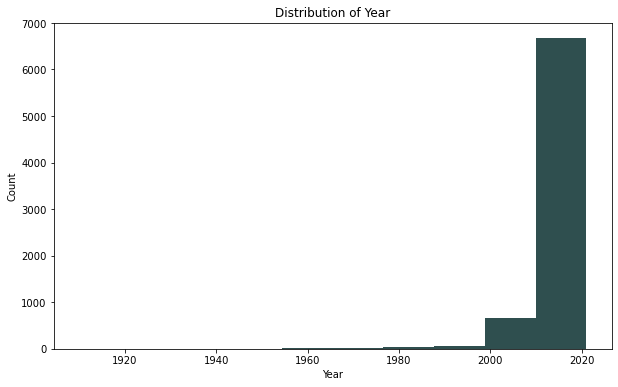

In [88]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.year, color="darkslategray")
axes.set_title("Distribution of Year")
axes.set_xlabel("Year")
axes.set_ylabel("Count")

plt.show()
plt.close()

In [89]:
df.rating.value_counts()

4.2    5679
4.3     707
4.4     484
4.5     281
4.6     191
4.7     112
4.8      44
4.9       2
Name: rating, dtype: int64

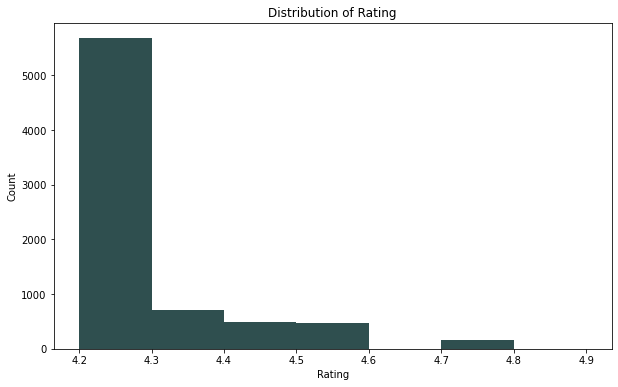

In [90]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.rating, color="darkslategray", bins=7)
axes.set_title("Distribution of Rating")
axes.set_xlabel("Rating")
axes.set_ylabel("Count")

plt.show()
plt.close()

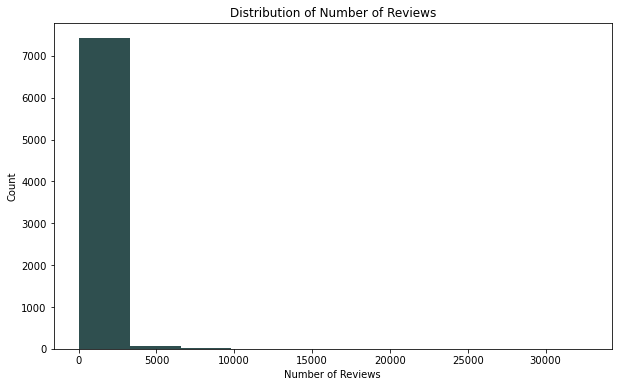

In [91]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.numreviews, color="darkslategray")
axes.set_title("Distribution of Number of Reviews")
axes.set_xlabel("Number of Reviews")
axes.set_ylabel("Count")

plt.show()
plt.close()

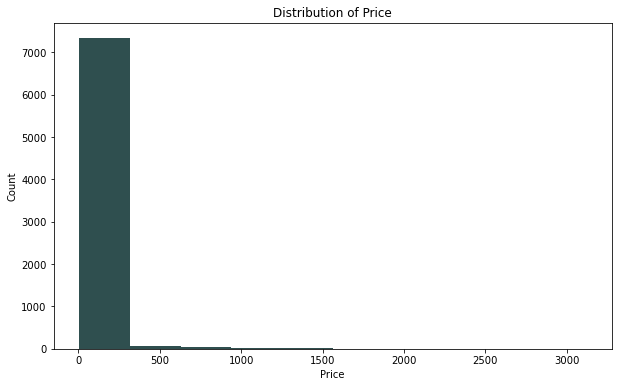

In [92]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.price, color="darkslategray")
axes.set_title("Distribution of Price")
axes.set_xlabel("Price")
axes.set_ylabel("Count")

plt.show()
plt.close()

In [93]:
df.body.value_counts()

4.0    5243
5.0    1670
3.0     553
2.0      34
Name: body, dtype: int64

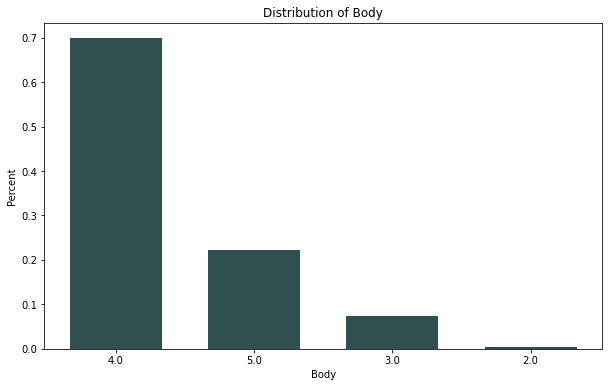

In [94]:
data = df.body.value_counts(normalize=True)
x = range( len( data))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, data, width, align="center", color="darkslategray")
axes.set_xticks([0, 1, 2, 3])
axes.set_xticklabels(data.axes[0])
axes.set_title( "Distribution of Body")
axes.set_xlabel("Body")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

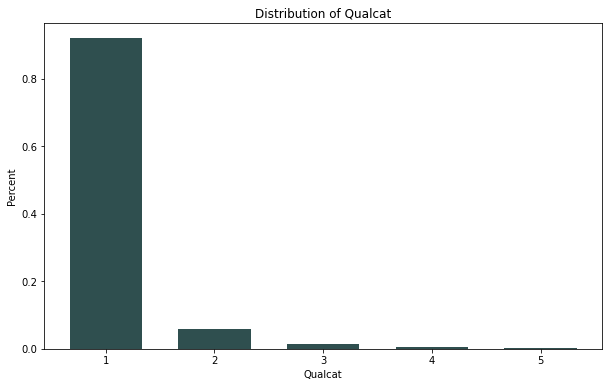

In [95]:
data = df.qualcat.value_counts(normalize=True)
x = range( len( data))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, data, width, align="center", color="darkslategray")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(data.axes[0])
axes.set_title( "Distribution of Qualcat")
axes.set_xlabel("Qualcat")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

In [96]:
df.acidity.value_counts()

3.0    7197
2.0     268
1.0      35
Name: acidity, dtype: int64

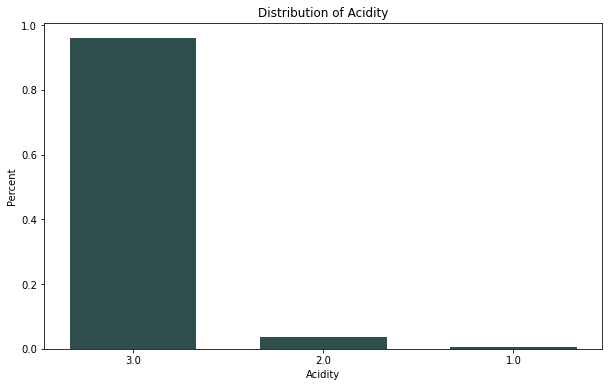

In [97]:
data = df.acidity.value_counts(normalize=True)
x = range( len( data))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, data, width, align="center", color="darkslategray")
axes.set_xticks([0, 1, 2])
axes.set_xticklabels(data.axes[0])
axes.set_title( "Distribution of Acidity")
axes.set_xlabel("Acidity")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

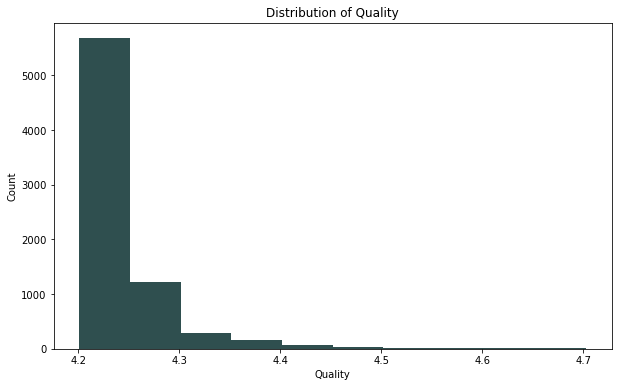

In [98]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.quality, color="darkslategray")
axes.set_title("Distribution of Quality")
axes.set_xlabel("Quality")
axes.set_ylabel("Count")

plt.show()
plt.close()

In [99]:
df.winery.value_counts()

Contino                                 457
Artadi                                  261
La Rioja Alta                           254
Sierra Cantabria                        237
Matarromera                             232
                                       ... 
Briego                                    1
Guillem Carol - Cellers Carol Valles      1
Particular                                1
Bodegas Asenjo & Manso                    1
Joan Simo                                 1
Name: winery, Length: 480, dtype: int64

In [100]:
df.wine.value_counts()

Reserva                         467
Gran Reserva                    458
Rioja Reserva                   240
El Viejo                        224
Corimbo I                       223
                               ... 
4 Varietales Coleccion Rioja      1
Noble                             1
Primordium                        1
Finca Helena                      1
Capricho Crianza                  1
Name: wine, Length: 847, dtype: int64

In [101]:
df.region.value_counts()

Rioja                              2440
Ribera del Duero                   1413
Priorato                            686
Toro                                300
Vino de Espana                      263
                                   ... 
Ribera del Gallego-Cinco Villas       1
Monterrei                             1
Jerez Cream                           1
Condado de Huelva                     1
Abona                                 1
Name: region, Length: 76, dtype: int64

In [102]:
df.type.value_counts()

Rioja Red               2358
Ribera Del Duero Red    1951
Red                      864
Priorat Red              674
Toro Red                 296
Tempranillo              291
Sherry                   274
Albarino                 252
Mencia                   235
Rioja White               92
Pedro Ximenez             35
Grenache                  35
Cava                      33
Verdejo                   27
Monastrell                18
Montsant Red              17
Syrah                     15
Chardonnay                13
Cabernet Sauvignon        11
Sparkling                  5
Sauvignon Blanc            4
Name: type, dtype: int64

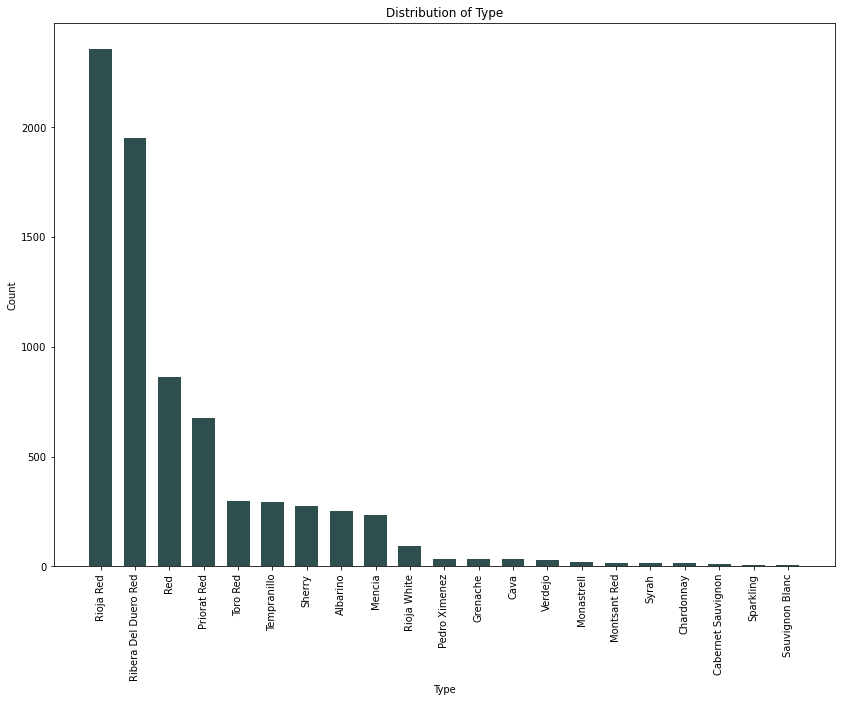

In [103]:
data = df.type.value_counts(normalize=False)
x = range( len( data))
width = 1/1.5

figure = plt.figure(figsize=(14, 10))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, data, width, align="center", color="darkslategray")
axes.set_xticks([0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
axes.set_xticklabels(data.axes[0], rotation=90)
axes.set_title( "Distribution of Type")
axes.set_xlabel("Type")
axes.set_ylabel( "Count")
axes.xaxis.grid(False)

plt.show()
plt.close()

## Pairwise Data Analysis

<AxesSubplot:>

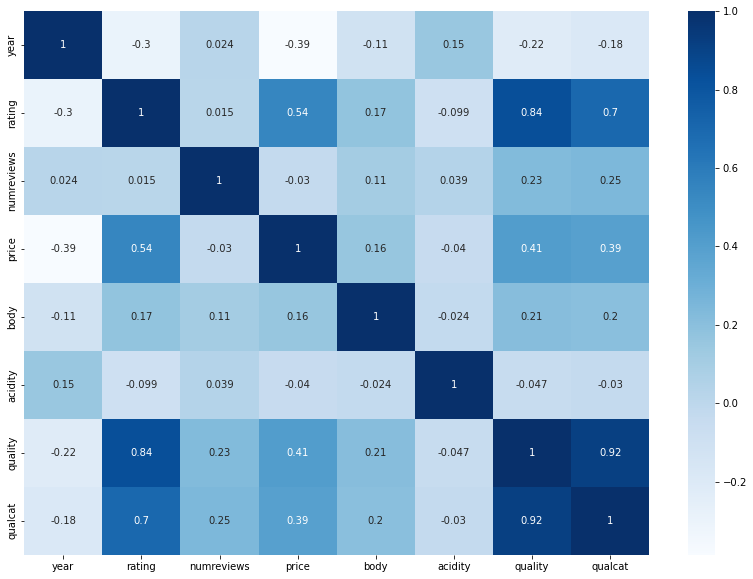

In [104]:
plt.figure(figsize=[14,10])
sns.heatmap(df.corr(),annot=True, cmap="Blues")

In [105]:
df.drop(['rating', 'numreviews'], axis=1,inplace=True)

<AxesSubplot:>

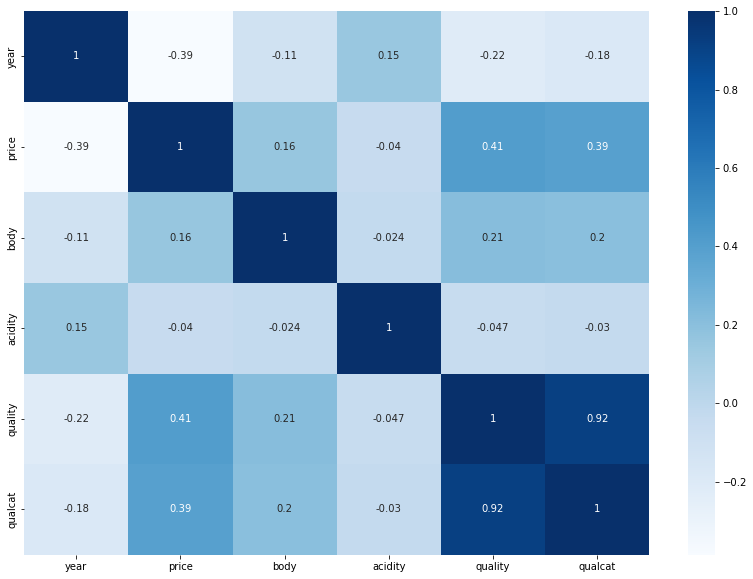

In [106]:
plt.figure(figsize=[14,10])
sns.heatmap(df.corr(),annot=True, cmap="Blues")

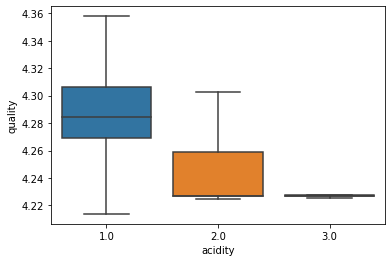

In [107]:
ax = sns.boxplot(x="acidity", y="quality", data=df, showfliers=False)  
plt.show()

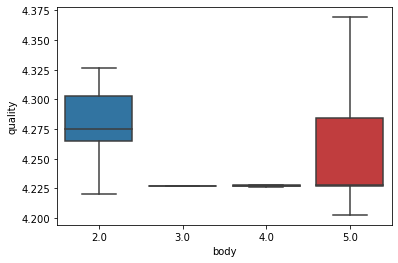

In [108]:
ax = sns.boxplot(x="body", y="quality", data=df, showfliers=False)  
plt.show()

In [109]:
df.head()

,year,price,body,acidity,winery,wine,region,type,quality,qualcat
0,2013.0,995.00,5.0,3.0,Teso La Monja,Tinto,Toro,Toro Red,4.338633,2
1,2018.0,313.50,4.0,2.0,Artadi,Vina El Pison,Vino de Espana,Tempranillo,4.302545,2
2,2009.0,324.95,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.702827,5
3,1999.0,692.96,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.698744,5
4,1996.0,778.06,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.675129,5


In [110]:
df2 = df.drop(['quality'], axis=1)

In [111]:
df2.head()

,year,price,body,acidity,winery,wine,region,type,qualcat
0,2013.0,995.00,5.0,3.0,Teso La Monja,Tinto,Toro,Toro Red,2
1,2018.0,313.50,4.0,2.0,Artadi,Vina El Pison,Vino de Espana,Tempranillo,2
2,2009.0,324.95,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,5
3,1999.0,692.96,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,5
4,1996.0,778.06,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,5


In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     7500 non-null   float64
 1   price    7500 non-null   float64
 2   body     7500 non-null   float64
 3   acidity  7500 non-null   float64
 4   winery   7500 non-null   object 
 5   wine     7500 non-null   object 
 6   region   7500 non-null   object 
 7   type     7500 non-null   object 
 8   qualcat  7500 non-null   int32  
dtypes: float64(4), int32(1), object(4)
memory usage: 498.2+ KB


## Classification Model

In [113]:
for i in df2:
    if df2[i].dtypes == 'object':
        df2[i] = LabelEncoder().fit_transform(df2[i])
df2.head()

,year,price,body,acidity,winery,wine,region,type,qualcat
0,2013.0,995.00,5.0,3.0,422,759,69,19,2
1,2018.0,313.50,4.0,2.0,33,819,74,18,2
2,2009.0,324.95,5.0,3.0,447,778,57,11,5
3,1999.0,692.96,5.0,3.0,447,778,57,11,5
4,1996.0,778.06,5.0,3.0,447,778,57,11,5


In [114]:
x = df2.drop('qualcat', axis=1)
y = df2['qualcat']

In [115]:
scaled_features = StandardScaler().fit_transform(x.values)
x = pd.DataFrame(scaled_features, index=x.index, columns=x.columns)
x.head()

,year,price,body,acidity,winery,wine,region,type
0,-0.070613,6.218324,1.583713,0.196933,1.273008,1.257374,1.086370,2.234744
1,0.664124,1.685466,-0.257528,-4.172880,-1.753308,1.516556,1.375263,1.950667
2,-0.658403,1.761623,1.583713,0.196933,1.467501,1.339448,0.393026,-0.037877
3,-2.127877,4.209367,1.583713,0.196933,1.467501,1.339448,0.393026,-0.037877
4,-2.568719,4.775392,1.583713,0.196933,1.467501,1.339448,0.393026,-0.037877


In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=101)

In [117]:
x_train

,year,price,body,acidity,winery,wine,region,type
6262,0.958019,-0.320232,-0.257528,0.196933,0.977378,1.317850,0.335247,-0.037877
5193,-0.364508,0.012266,-0.257528,0.196933,-0.773062,0.851323,0.508583,0.246201
1998,-0.364508,-0.186874,1.583713,0.196933,-0.983114,-1.459711,1.433041,-1.458265
1630,0.517176,-0.186874,-0.257528,0.196933,-1.659951,-1.088217,0.508583,0.246201
1881,0.517176,-0.287441,1.583713,0.196933,0.448356,-1.148693,0.393026,-0.037877
...,...,...,...,...,...,...,...,...
599,0.811071,-0.200509,1.583713,0.196933,0.549493,-0.617371,-2.207013,-2.026421
5695,0.664124,-0.288239,-0.257528,0.196933,-0.780841,-0.120607,0.161911,-0.606032
1361,-0.217561,-0.240084,1.583713,0.196933,-1.473238,1.153702,0.393026,-0.037877
1547,0.517176,-0.239419,-0.257528,0.196933,0.059370,-1.433793,-1.918120,-2.594576


In [118]:
undersample = RandomUnderSampler(sampling_strategy = {1:1000})
x_train, y_train = undersample.fit_resample(x_train, y_train)
oversample = RandomOverSampler(sampling_strategy = {2:100,3:100, 4:100, 5:100})
x_train, y_train = undersample.fit_resample(x_train, y_train)

In [119]:
y.head()

0    2
1    2
2    5
3    5
4    5
Name: qualcat, dtype: int32

In [120]:
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf7 = GradientBoostingClassifier(random_state=42)
clf8 = ExtraTreesClassifier()
clf9 = BaggingClassifier()
clf10= XGBClassifier()

In [121]:
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]

param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['none', 'l2']

param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]

param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

param8 = {}
param8['classifier__n_estimators'] = [10, 50, 100, 250]
param8['classifier__max_depth'] = [5, 10, 15, 20]
param8['classifier'] = [clf8]

param9 = {}
param9['classifier__n_estimators'] = [10, 50, 100, 250]
param9['classifier__max_samples'] = [0.05, 0.1, 0.2, 0.5]
param9['classifier'] = [clf9]

param10 = {}
param10['classifier__n_estimators'] = [10, 50, 100, 250]
param10['classifier__max_depth'] = range(3,10,2)
param10['classifier'] = [clf10]

In [122]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param7, param8, param9, param10]

In [123]:
gs = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, error_score='raise').fit(x_train, y_train)

In [124]:
gs.best_params_

{'classifier': RandomForestClassifier(max_depth=20, random_state=42),
 'classifier__max_depth': 20,
 'classifier__n_estimators': 100}

In [125]:
gs.best_score_

0.8454818454818456

In [126]:
model = ExtraTreesClassifier(n_estimators = 250, max_depth=20)
model.fit(x_train, y_train)

ExtraTreesClassifier(max_depth=20, n_estimators=250)

In [127]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8886666666666667

In [303]:
model.feature_importances_

array([0.18692699, 0.27809146, 0.06768947, 0.01016362, 0.1603711 ,
       0.1762625 , 0.0642756 , 0.05621927])

In [304]:
featuredf = pd.DataFrame(columns=df2.columns)

In [305]:
featuredf.drop('qualcat', axis=1,inplace=True)

In [306]:
featuredf.append(pd.DataFrame(model.feature_importances_.reshape(1,-1), columns=list(featuredf)), ignore_index=True)

,year,price,body,acidity,winery,wine,region,type
0,0.186927,0.278091,0.067689,0.010164,0.160371,0.176262,0.064276,0.056219


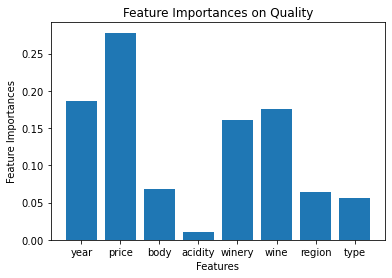

In [307]:
plt.bar(featuredf.columns, model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.title('Feature Importances on Quality')
plt.show()

In [490]:
classfeatures = featuredf.drop(columns=['body','acidity','region','type'])
classfeatures = " + ".join(classfeatures.iloc[:,[0,1,2,3]])
classfeatures

'year + price + winery + wine'

In [395]:
grouped = df.groupby( "qualcat")
grouped_y = grouped["year"].describe()
grouped_y

,count,mean,std,min,25%,50%,75%,max
qualcat,,,,,,,,
1,6897.0,2013.871103,5.841343,1922.0,2011.00,2015.0,2017.0,2021.0
2,447.0,2009.241611,13.103581,1910.0,2007.50,2014.0,2016.0,2020.0
3,102.0,2009.666667,11.335857,1962.0,2008.25,2014.0,2016.0,2019.0
4,34.0,2005.852941,15.630453,1946.0,2000.50,2011.5,2016.0,2019.0
5,20.0,2005.950000,6.176995,1995.0,2002.25,2006.0,2010.0,2016.0


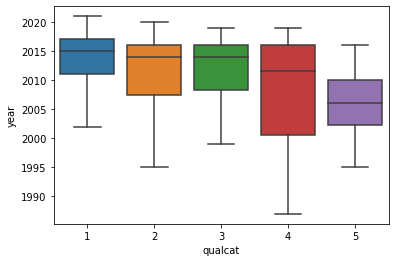

In [410]:
ax = sns.boxplot(x="qualcat", y="year", data=df, showfliers = False)
plt.show()

In [412]:
grouped = df.groupby( "qualcat")
grouped_y = grouped["price"].describe()
grouped_y

,count,mean,std,min,25%,50%,75%,max
qualcat,,,,,,,,
1,6897.0,42.589543,84.027727,4.99,18.9000,27.900000,48.96,3119.08
2,447.0,231.189759,390.685164,19.60,47.9500,80.950000,195.00,2884.04
3,102.0,331.525626,463.674091,29.80,64.2500,123.468413,286.70,2087.25
4,34.0,349.114940,272.435035,75.10,131.2125,237.100000,495.72,925.00
5,20.0,397.562000,201.366297,107.57,238.1250,355.625000,506.30,810.89


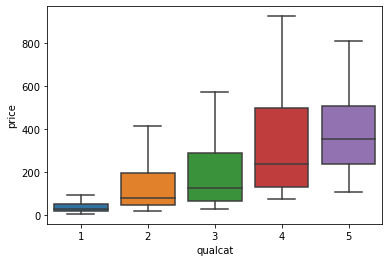

In [411]:
ax = sns.boxplot(x="qualcat", y="price", data=df, showfliers = False)
plt.show()

In [427]:
grouped = df.groupby( "winery")
grouped_y = grouped["qualcat"].describe()
winerydata = grouped_y.sort_values(by=['mean'],ascending=False).head()
winerydata

,count,mean,std,min,25%,50%,75%,max
winery,,,,,,,,
Pago de Carraovejas,11.0,3.181818,0.873863,1.0,3.00,3.0,4.00,4.0
Vega Sicilia,97.0,3.144330,1.290911,1.0,2.00,3.0,4.00,5.0
Bodegas El Nido,13.0,2.846154,0.554700,2.0,3.00,3.0,3.00,4.0
Aalto,12.0,2.583333,1.164500,1.0,1.75,3.0,3.25,4.0
Quinta de la Quietud,2.0,2.500000,0.707107,2.0,2.25,2.5,2.75,3.0


<AxesSubplot:xlabel='winery'>

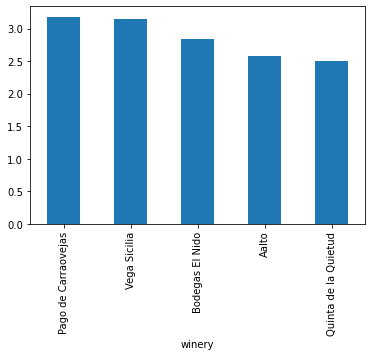

In [447]:
winerydata['mean'].plot(kind = 'bar', )

In [449]:
grouped = df.groupby( "wine")
grouped_y = grouped["qualcat"].describe()
winedata = grouped_y.sort_values(by=['mean'],ascending=False).head()
winedata

,count,mean,std,min,25%,50%,75%,max
wine,,,,,,,,
El Anejon,2.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
Cuesta de Las Liebres,3.0,3.666667,0.577350,3.0,3.5,4.0,4.0,4.0
PS (Pagos Seleccionados) Ribera del Duero,6.0,3.500000,0.547723,3.0,3.0,3.5,4.0,4.0
Unico,41.0,3.463415,1.324718,1.0,2.0,4.0,5.0,5.0
Valbuena 5o,32.0,3.031250,1.379209,1.0,2.0,3.0,4.0,5.0


In [502]:
winedata1 = winedata.iloc[[0,1,2,3,4],[0]].T
winedata1

wine,El Anejon,Cuesta de Las Liebres,PS (Pagos Seleccionados) Ribera del Duero,Unico,Valbuena 5o
count,2.0,3.0,6.0,41.0,32.0


<AxesSubplot:xlabel='wine'>

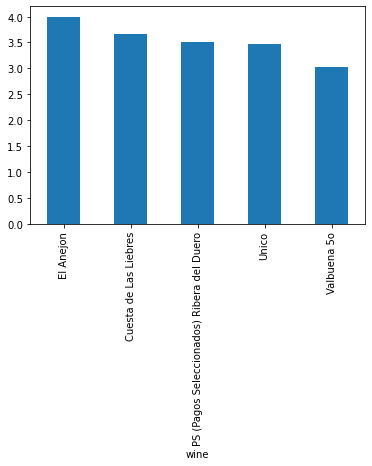

In [450]:
winedata['mean'].plot(kind = 'bar')

# Regression Model

In [128]:
df4 = df.drop(['qualcat'], axis=1)
df4.head()

,year,price,body,acidity,winery,wine,region,type,quality
0,2013.0,995.00,5.0,3.0,Teso La Monja,Tinto,Toro,Toro Red,4.338633
1,2018.0,313.50,4.0,2.0,Artadi,Vina El Pison,Vino de Espana,Tempranillo,4.302545
2,2009.0,324.95,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.702827
3,1999.0,692.96,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.698744
4,1996.0,778.06,5.0,3.0,Vega Sicilia,Unico,Ribera del Duero,Ribera Del Duero Red,4.675129


In [129]:
df4=pd.get_dummies(df4, columns=['winery','wine','region','type'], drop_first=True)

In [130]:
df4.head(10)

,year,price,body,acidity,quality,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,winery_Abel Mendoza Monge,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
0,2013.0,995.00,5.0,3.0,4.338633,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2018.0,313.50,4.0,2.0,4.302545,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2009.0,324.95,5.0,3.0,4.702827,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1999.0,692.96,5.0,3.0,4.698744,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1996.0,778.06,5.0,3.0,4.675129,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1998.0,490.00,5.0,3.0,4.667315,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,2010.0,349.00,5.0,3.0,4.666647,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1995.0,810.89,5.0,3.0,4.638760,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,2015.0,345.00,5.0,3.0,4.594544,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,2011.0,315.00,5.0,3.0,4.591922,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [131]:
scaled_features = StandardScaler().fit_transform(df4.values)
df4 = pd.DataFrame(scaled_features, index=df4.index, columns=df4.columns)

In [132]:
df4.head()

,year,price,body,acidity,quality,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,winery_Abel Mendoza Monge,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
0,-0.070613,6.218324,1.583713,0.196933,1.859223,-0.011548,-0.040032,-0.020004,-0.060108,-0.0231,...,-0.592954,-0.677183,-0.111441,-0.0231,-0.194727,-0.025828,-0.044766,-0.200913,4.933339,-0.060108
1,0.664124,1.685466,-0.257528,-4.172880,1.129817,-0.011548,-0.040032,-0.020004,-0.060108,-0.0231,...,-0.592954,-0.677183,-0.111441,-0.0231,-0.194727,-0.025828,-0.044766,4.977268,-0.202702,-0.060108
2,-0.658403,1.761623,1.583713,0.196933,9.220300,-0.011548,-0.040032,-0.020004,-0.060108,-0.0231,...,1.686470,-0.677183,-0.111441,-0.0231,-0.194727,-0.025828,-0.044766,-0.200913,-0.202702,-0.060108
3,-2.127877,4.209367,1.583713,0.196933,9.137761,-0.011548,-0.040032,-0.020004,-0.060108,-0.0231,...,1.686470,-0.677183,-0.111441,-0.0231,-0.194727,-0.025828,-0.044766,-0.200913,-0.202702,-0.060108
4,-2.568719,4.775392,1.583713,0.196933,8.660464,-0.011548,-0.040032,-0.020004,-0.060108,-0.0231,...,1.686470,-0.677183,-0.111441,-0.0231,-0.194727,-0.025828,-0.044766,-0.200913,-0.202702,-0.060108


In [133]:
X = df4.drop(columns=['quality'])
Y = df4['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)

In [134]:
models = {}
def train_validate_predict(regressor, X_train, Y_train, X_test, Y_test, index):
    model = regressor
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)

    r2 = r2_score(Y_test, Y_pred)
    models[index] = r2

In [135]:
model_list = [LinearRegression, Lasso, Ridge, BayesianRidge, DecisionTreeRegressor, RandomForestRegressor]
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Bayesian Ridge', 'Decision Tree Regressor', 'Random Forest Regressor']

index = 0
for regressor in model_list:
    train_validate_predict(regressor(), X_train, Y_train, X_test, Y_test, model_names[index])
    index+=1

In [136]:
models

{'Linear Regression': -1.4773952570963778e+28,
 'Lasso': -0.00048115908606205515,
 'Ridge': 0.7112124853088507,
 'Bayesian Ridge': 0.7264429224655733,
 'Decision Tree Regressor': 0.7216288456684126,
 'Random Forest Regressor': 0.8134749412998675}

In [137]:
fmodel = RandomForestRegressor()
fmodel.fit(X_train,Y_train)
Y_pred = fmodel.predict(X_test)
print(r2_score(Y_test, Y_pred))

0.8190752135642401


In [321]:
fmodel.feature_importances_

array([0.12178065, 0.41956823, 0.00639443, ..., 0.00045703, 0.00462186,
       0.00086751])

In [322]:
featmodel = pd.DataFrame(columns=df4.columns)
featmodel.drop('quality', axis=1,inplace=True)
featmodel=featmodel.append(pd.DataFrame(fmodel.feature_importances_.reshape(1,-1), columns=list(featmodel)), ignore_index=True)

In [323]:
featmodel.head()

,year,price,body,acidity,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,winery_Abel Mendoza Monge,winery_Acustic Celler,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
0,0.121781,0.419568,0.006394,0.001097,0.000001,0.006893,0.000036,0.001018,0.000007,0.00004,...,0.000996,0.003103,0.000209,0.000088,0.000966,0.000029,0.00035,0.000457,0.004622,0.000868


In [473]:
details = featmodel.sort_values(by=0, ascending=False, axis=1)

In [474]:
details

,price,year,winery_Vega Sicilia,winery_Pago de Carraovejas,winery_Alion,wine_Unico,winery_Dominio de Pingus,wine_PS (Pagos Seleccionados) Ribera del Duero,winery_Remirez de Ganuza,winery_Bodegas El Nido,...,wine_La Loma,wine_Angel Ribera del Duero,winery_Arid,wine_Angeles de Amaren Tempranillo - Graciano,wine_Arcos de la Frontera,wine_Rioja 150 Aniversario,winery_Anibal de Otero,wine_Branco Vermu,wine_Cabernet,wine_Don Miguel Comenge Reserva
0,0.419568,0.121781,0.113576,0.015867,0.014486,0.013011,0.011884,0.009256,0.007482,0.007345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


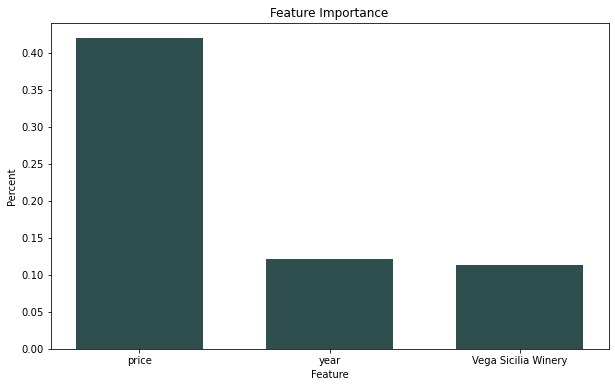

In [475]:
data=[0.419568,0.121781,0.113576]
x = range(3)
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, data, width, align="center", color="darkslategray")
axes.set_xticks([0, 1, 2])
axes.set_xticklabels(['price','year','Vega Sicilia Winery'])
axes.set_title( "Feature Importance")
axes.set_xlabel("Feature")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

In [483]:
regfeatures = " + ".join(details.iloc[:,[0,1,2]])
regfeatures

'price + year + winery_Vega Sicilia'

In [504]:
bestwines = ", ".join(winedata1.iloc[:,[0,1,2,3,4]])
bestwines

'El Anejon, Cuesta de Las Liebres, PS (Pagos Seleccionados) Ribera del Duero, Unico, Valbuena 5o'

## Output Report

In [510]:
f= open("output.txt","w+")
regtext = 'The most important features according to the regression model are ' + regfeatures + ', which explain over 60% of data. \n'
classtext = 'According to the clutering algorithm, the most important features are ' + classfeatures + ' which explain over 80% of the data. \n\n'
indepth = "To focus on quality, a measure of rating and number of reviews, the business should buy wine that's from 2005 and older which will put the wines in the top 2 tiers. \n"
indepth2 = "The business should also focus on wine that is around $300 dollars, which is the mean value for the top 3 categories of wine quality. \n"
indepth3 = "The winery that produced the best wine was the Vega Sicilia, with over 11% of the variability coming from this single winery. Other honorable mentions are Pago de Carraovejas and Bodegas El Nido. \n"
indepth4 = "Finally, the wines of highest quality were " + bestwines + "."
f.write(regtext)
f.write(classtext)
f.write(indepth)
f.write(indepth2)
f.write(indepth3)
f.write(indepth4)
f.close()